In [ ]:
#load raw data set
import pandas as pd


df = pd.read_csv(r"C:\Users\NPG\Desktop\maheswar\churn_prediction\churn-prediction-dashboard\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)
# Check overall info and missing values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())



Shape of the dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

In [ ]:

# 1. Standardize column names to snake_case
df.columns = (
    df.columns
      .str.strip()                # remove whitespace
      .str.lower()                # lowercase
      .str.replace(' ', '_')      # spaces → underscores
)
print("Columns after standardization:\n", df.columns.tolist())


Columns after standardization:
 ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


In [ ]:

# 2. Convert TotalCharges (currently object) → numeric
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
print("Missing after conversion:", df['totalcharges'].isnull().sum())


Missing after conversion: 11


In [14]:
# %%
df = df.dropna(subset=['totalcharges'])
print("New shape after dropping:", df.shape)


New shape after dropping: (7032, 21)


In [17]:
# %%
# Reload the raw or intermediate DataFrame
import pandas as pd
df = pd.read_csv(r"C:\Users\NPG\Desktop\maheswar\churn_prediction\churn-prediction-dashboard\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Standardize columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert TotalCharges and drop NaNs
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df = df.dropna(subset=['totalcharges'])

# **Reapply** binary encoding, including gender
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Then your other binary columns
for col in ['partner','dependents','phoneservice','paperlessbilling','churn']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode multi-category columns
multi_cat = [
    'multiplelines','internetservice','onlinesecurity','onlinebackup',
    'deviceprotection','techsupport','streamingtv','streamingmovies',
    'contract','paymentmethod'
]
df = pd.get_dummies(df, columns=multi_cat, drop_first=True)

# Verify gender now
print("Unique values in gender:", df['gender'].unique())
# %%
# Convert any boolean columns (True/False) to integers 1/0
bool_cols = df.select_dtypes(include='bool').columns
for col in bool_cols:
    df[col] = df[col].astype(int)

print("Converted boolean columns to ints:", list(bool_cols))

# Export cleaned DataFrame
import os
os.makedirs("data/cleaned", exist_ok=True)
df.to_csv("data/cleaned/telco_churn_cleaned.csv", index=False)
print("Export done with shape:", df.shape)



Unique values in gender: [0 1]
Converted boolean columns to ints: ['multiplelines_No phone service', 'multiplelines_Yes', 'internetservice_Fiber optic', 'internetservice_No', 'onlinesecurity_No internet service', 'onlinesecurity_Yes', 'onlinebackup_No internet service', 'onlinebackup_Yes', 'deviceprotection_No internet service', 'deviceprotection_Yes', 'techsupport_No internet service', 'techsupport_Yes', 'streamingtv_No internet service', 'streamingtv_Yes', 'streamingmovies_No internet service', 'streamingmovies_Yes', 'contract_One year', 'contract_Two year', 'paymentmethod_Credit card (automatic)', 'paymentmethod_Electronic check', 'paymentmethod_Mailed check']
Export done with shape: (7032, 32)


In [10]:
# %%
import pandas as pd
df2 = pd.read_csv("data/cleaned/telco_churn_cleaned.csv")
print(df2.dtypes.value_counts())
print(df2.head())


int64      29
float64     2
object      1
Name: count, dtype: int64
   customerid  gender  seniorcitizen  partner  dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   phoneservice  paperlessbilling  monthlycharges  totalcharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   techsupport_Yes  streamingtv_No internet service  streamingtv_Yes  \
0           

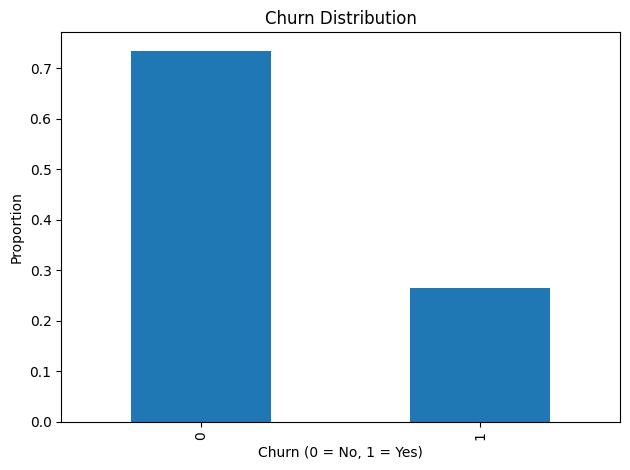

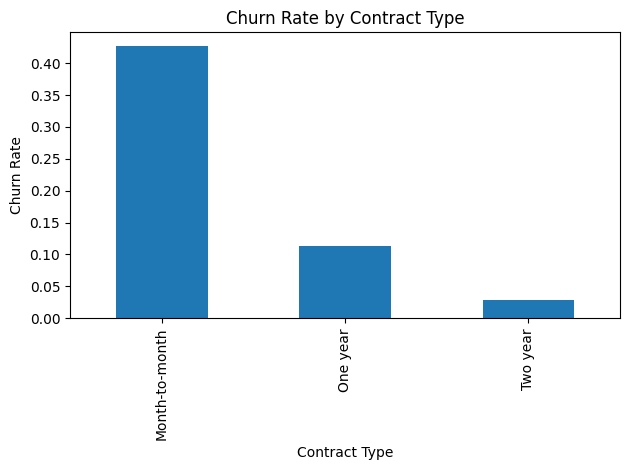

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload cleaned data with absolute path
df = pd.read_csv("data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df = df.dropna(subset=['totalcharges'])
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

# Plot: Churn Distribution
plt.figure()
df['churn'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.title('Churn Distribution')
plt.tight_layout()
plt.show()

# Plot: Churn Rate by Contract Type
orig = pd.read_csv("data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
orig.columns = orig.columns.str.strip().str.lower().str.replace(' ', '_')
orig['totalcharges'] = pd.to_numeric(orig['totalcharges'], errors='coerce')
orig = orig.dropna(subset=['totalcharges'])
orig['churn_flag'] = orig['churn'].map({'Yes': 1, 'No': 0})
contract_churn = orig.groupby('contract')['churn_flag'].mean()

plt.figure()
contract_churn.plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# 1. Load your cleaned CSV
df = pd.read_csv("data/cleaned/telco_churn_cleaned.csv")

# 2. Define base columns and their SQL types
base_cols = {
    "customerid": "VARCHAR PRIMARY KEY",
    "gender": "SMALLINT",
    "seniorcitizen": "SMALLINT",
    "partner": "SMALLINT",
    "dependents": "SMALLINT",
    "tenure": "INTEGER",
    "phoneservice": "SMALLINT",
    "paperlessbilling": "SMALLINT",
    "monthlycharges": "NUMERIC(8,2)",
    "totalcharges": "NUMERIC(10,2)",
    "churn": "SMALLINT"
}

# 3. Build the DDL lines
lines = ["DROP TABLE IF EXISTS telco_customers;", "CREATE TABLE telco_customers ("]
for col, sql_type in base_cols.items():
    lines.append(f"  {col} {sql_type},")
for col in df.columns:
    if col not in base_cols:
        # sanitize names for SQL
        safe_col = col.lower().replace(" ", "_").replace("(", "").replace(")", "")
        lines.append(f"  {safe_col} SMALLINT,")
# remove the trailing comma on the last column
lines[-1] = lines[-1].rstrip(",")
lines.append(");")

# 4. Print the DDL
print("\n".join(lines))


DROP TABLE IF EXISTS telco_customers;
CREATE TABLE telco_customers (
  customerid VARCHAR PRIMARY KEY,
  gender SMALLINT,
  seniorcitizen SMALLINT,
  partner SMALLINT,
  dependents SMALLINT,
  tenure INTEGER,
  phoneservice SMALLINT,
  paperlessbilling SMALLINT,
  monthlycharges NUMERIC(8,2),
  totalcharges NUMERIC(10,2),
  churn SMALLINT,
  multiplelines_no_phone_service SMALLINT,
  multiplelines_yes SMALLINT,
  internetservice_fiber_optic SMALLINT,
  internetservice_no SMALLINT,
  onlinesecurity_no_internet_service SMALLINT,
  onlinesecurity_yes SMALLINT,
  onlinebackup_no_internet_service SMALLINT,
  onlinebackup_yes SMALLINT,
  deviceprotection_no_internet_service SMALLINT,
  deviceprotection_yes SMALLINT,
  techsupport_no_internet_service SMALLINT,
  techsupport_yes SMALLINT,
  streamingtv_no_internet_service SMALLINT,
  streamingtv_yes SMALLINT,
  streamingmovies_no_internet_service SMALLINT,
  streamingmovies_yes SMALLINT,
  contract_one_year SMALLINT,
  contract_two_year SMALLI

In [11]:
import pandas as pd

df = pd.read_csv("data/cleaned/telco_churn_cleaned.csv")
print("Churned count:", df[df['churn'] == 1].shape[0])


Churned count: 1869


In [13]:
# In a new notebook cell, run:
!pip install scikit-learn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.7 MB 11.2 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.7 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 18.9 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/38.4 MB 27.3 MB/s eta 0:00:02
   ------------ --------------------------- 11.5/38.4 MB 27.9 MB/s eta 0:00:01
   ------------------- -------------------- 18.9/38.4 MB 30.1 MB/s eta 0:00:01
   ------------------------- -------------- 24.6/38.4 MB 29.1 MB/s eta 0:00:01
   -------------------------------- ------- 30.9/38.4 MB 29.6 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.

In [14]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt


In [15]:
# 2. Load cleaned data
df = pd.read_csv("data/cleaned/telco_churn_cleaned.csv")


In [16]:
# 3. Split features & target
X = df.drop(columns=["customerid", "churn"])
y = df["churn"]


In [23]:
# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [18]:
# 5. Scale numeric features
num_cols = ["tenure", "monthlycharges", "totalcharges"]
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [ ]:
# 6. Train Logistic Regression
model = LogisticRegression(
    solver="liblinear",
    random_state=42
)
model.fit(X_train,  y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [20]:
# 7. Predict & get probabilities
y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [21]:
# 8. Compute metrics
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred)
rec   = recall_score(y_test, y_pred)
auc   = roc_auc_score(y_test, y_proba)
cm    = confusion_matrix(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("ROC AUC  :", auc)
print("Confusion Matrix:\n", cm)


Accuracy : 0.8031272210376688
Precision: 0.6474164133738601
Recall   : 0.56951871657754
ROC AUC  : 0.8361904737253522
Confusion Matrix:
 [[917 116]
 [161 213]]


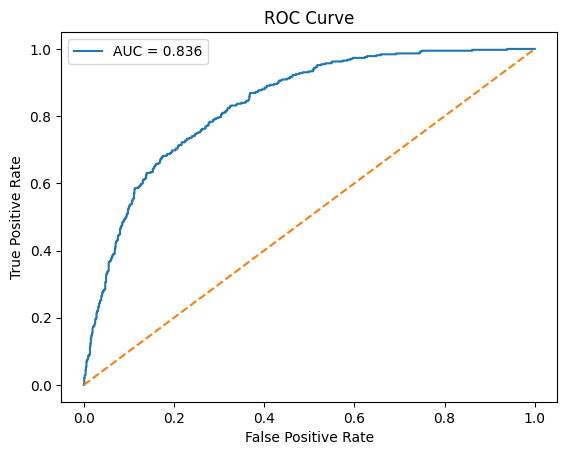

In [22]:
# 9. Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
